In [29]:
#importing required libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# Load the MNIST dataset, which contains images of handwritten digits (0-9), into training and testing sets.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Print the shapes of the training and testing data for both images and labels.
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape,"x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,) x_test shape: (10000, 28, 28) y_test shape: (10000,)


In [31]:
# Set the seed for NumPy's random number generator to 0, ensuring reproducibility of random values.
np.random.seed(0)

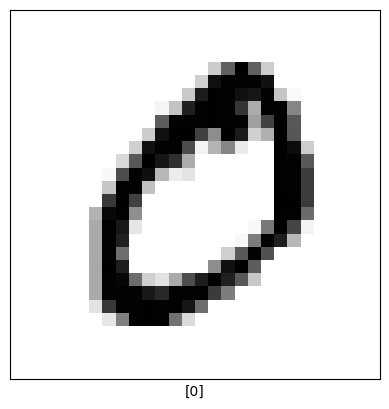

In [32]:
# Remove x-axis tick marks to simplify the display.
plt.xticks([])
# Remove y-axis tick marks to simplify the display.
plt.yticks([])
# Label the x-axis with the actual digit label of the second training sample from y_train.
plt.xlabel([y_train[1]])
# Display the second training image (from x_train) in grayscale (binary colormap).
plt.imshow(x_train[1],cmap=plt.cm.binary)

In [33]:
# Convert training images to float32 type and scale pixel values to the range [0, 1].
x_train = x_train.astype('float32') / 255
# Convert test images to float32 type and scale pixel values to the range [0, 1].
x_test = x_test.astype('float32') / 255

In [34]:
# Initialize a Sequential model to build a feed-forward neural network layer by layer.
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
# Add a 2D convolutional layer with 64 filters, 2x2 kernel size, stride of 1x1, same padding, and ReLU activation. Input shape is (28, 28, 1) for grayscale images.
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu', input_shape=(28,28,1)))
# Add a max pooling layer with a 2x2 pool size to reduce the spatial dimensions by half.
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
# Add a dropout layer with a 30% dropout rate to prevent overfitting by randomly setting 30% of inputs to zero during training.
model.add(tf.keras.layers.Dropout(0.3))
# Add another 2D convolutional layer with 32 filters, 2x2 kernel size, stride of 1x1, same padding, and ReLU activation.
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu'))
# Add another max pooling layer with a 2x2 pool size to further reduce spatial dimensions.
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
# Add another dropout layer with a 30% dropout rate to prevent overfitting.
model.add(tf.keras.layers.Dropout(0.3))
# Flatten the output to create a 1D vector, which can be fed into the dense layers.
model.add(tf.keras.layers.Flatten())
# Add a dense (fully connected) layer with 256 units and ReLU activation to learn complex features.
model.add(tf.keras.layers.Dense(256, activation='relu'))
# Add a dropout layer with a 50% dropout rate to reduce overfitting in the fully connected layer.
model.add(tf.keras.layers.Dropout(0.5))
# Add the output layer with 10 units and softmax activation to classify the input into 10 categories (digits 0-9).
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
# Display the architecture and parameters of the model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 32)          │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         401,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 412,778 (1.57 MB)

 Trainable params: 412,778 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Compile the model, specifying the loss function, optimizer, and evaluation metric.
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [36]:
#Reshape for CNN
x_train = x_train.reshape(-1,28, 28,1)
x_test = x_test.reshape(-1,28, 28, 1)

In [ ]:
# Train the model using the training data (x_train, y_train) for 20 epochs with specific batch size and validation split.
model_log=model.fit(x_train, y_train,
          batch_size=60,
          epochs=20,
          verbose=1,
          validation_split=.3)

Epoch 1/20
700/700 ━━━━━━━━━━━━━━━━━━━━ 54s 75ms/step - accuracy: 0.7600 - loss: 0.7152 - val_accuracy: 0.9657 - val_loss: 0.1135
Epoch 2/20
700/700 ━━━━━━━━━━━━━━━━━━━━ 53s 75ms/step - accuracy: 0.9504 - loss: 0.1597 - val_accuracy: 0.9764 - val_loss: 0.0772
Epoch 3/20
700/700 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.9651 - loss: 0.1124 - val_accuracy: 0.9794 - val_loss: 0.0663
Epoch 4/20
700/700 ━━━━━━━━━━━━━━━━━━━━ 53s 75ms/step - accuracy: 0.9715 - loss: 0.0929 - val_accuracy: 0.9853 - val_loss: 0.0493
Epoch 5/20
700/700 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.9738 - loss: 0.0827 - val_accuracy: 0.9846 - val_loss: 0.0499
Epoch 6/20
700/700 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.9777 - loss: 0.0705 - val_accuracy: 0.9868 - val_loss: 0.0452
Epoch 7/20
700/700 ━━━━━━━━━━━━━━━━━━━━ 81s 75ms/step - accuracy: 0.9791 - loss: 0.0662 - val_accuracy: 0.9874 - val_loss: 0.0424
Epoch 8/20
700/700 ━━━━━━━━━━━━━━━━━━━━ 82s 74ms/step - accuracy: 0.9817 - loss: 0.0584 - 

In [ ]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])

In [ ]:
# Make predictions on the test set using the trained model.
predictions = model.predict(x_test)
# Access the predicted class probabilities for the first test image.
predictions[1]

In [ ]:
# Find the index of the highest predicted probability for the first test image.
np.argmax(predictions[1])

In [ ]:
# Reshape the test data to have a shape of (num_samples, 28, 28), removing the channel dimension.
x_test = x_test.reshape(-1,28, 28)
# Check the new shape of the test data after reshaping.
x_test.shape

In [ ]:
# Show one of the images from the test dataset
# Remove x-axis tick marks for cleaner visualization
plt.xticks([])
# Remove y-axis tick marks for cleaner visualization
plt.yticks([])
# Label the image with the true label of the first test image (from y_train)
plt.xlabel([y_train[0]]).
# Display the first image from x_test in grayscale (binary colormap)
plt.imshow(x_test[0],cmap=plt.cm.binary)

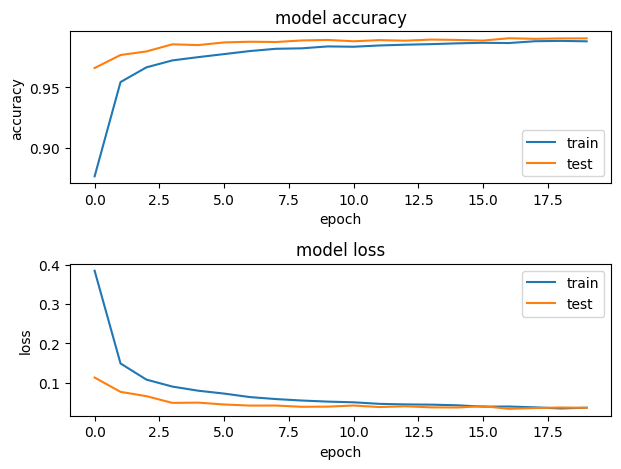

In [43]:
import os
# plotting the metrics
# Create a new figure for plotting
# Plotting accuracy
fig = plt.figure()
# Create the first subplot (2 rows, 1 column, first subplot)
plt.subplot(2,1,1)
# Plot training accuracy over epochs
plt.plot(model_log.history['accuracy'])
# Plot validation accuracy over epochs
plt.plot(model_log.history['val_accuracy'])
# Title for the accuracy plot
plt.title('model accuracy')
# Label for the y-axis (accuracy)
plt.ylabel('accuracy')
# Label for the x-axis (epoch)
plt.xlabel('epoch')
# Add a legend to distinguish train vs test
plt.legend(['train', 'test'], loc='lower right')

# Plotting loss
# Create the second subplot (2 rows, 1 column, second subplot)
plt.subplot(2,1,2)
# Plot training loss over epochs
plt.plot(model_log.history['loss'])
# Plot validation loss over epochs
plt.plot(model_log.history['val_loss'])
# Title for the loss plot
plt.title('model loss')
# Label for the y-axis (loss)
plt.ylabel('loss')
# Label for the x-axis (epoch)
plt.xlabel('epoch')
# Add a legend to distinguish train vs test
plt.legend(['train', 'test'], loc='upper right')
# Automatically adjust subplot parameters for better layout
plt.tight_layout()


In [44]:
# Function to plot a single image from the test set with its predicted and true labels
def plot_image(i, predictions_array, true_label, img):
  # Extract the i-th prediction, true label, and image from the provided arrays
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  # Remove the grid for better visualization of the image
  plt.grid(False)
  # Remove x-axis tick marks
  plt.xticks([])
  # Remove y-axis tick marks
  plt.yticks([])
  # Display the image in grayscale (binary colormap)
  plt.imshow(img, cmap=plt.cm.binary)
  # Get the predicted label (index of max probability)
  predicted_label = np.argmax(predictions_array)
  # Correct prediction, color the label blue
  if predicted_label == true_label:
    color = 'blue'
  # Incorrect prediction, color the label red
  else:
    color = 'red'
  # Add a label with the predicted label, predicted probability, and true label
  plt.xlabel("{} {:2.0f}% ({})".format([predicted_label],100*np.max(predictions_array),[true_label]),color=color) # Color the label based on whether prediction is correct or not

# Function to plot a bar chart of predicted probabilities for each class (digit)
def plot_value_array(i, predictions_array, true_label):
  # Extract the i-th prediction array and true label
  predictions_array, true_label = predictions_array[i], true_label[i]
  # Disable grid lines for cleaner visualization
  plt.grid(False)
  # Remove x-axis tick marks
  plt.xticks([])
  # Remove y-axis tick marks
  plt.yticks([])
  # Plot a bar chart for all class probabilities
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  # Set the y-axis limits to 0 and 1 (probabilities)
  plt.ylim([0, 1])
  # Get the predicted label (index of max probability)
  predicted_label = np.argmax(predictions_array)
  # Highlight the predicted label in red
  thisplot[predicted_label].set_color('red')
  # Highlight the predicted label in red
  thisplot[true_label].set_color('blue')

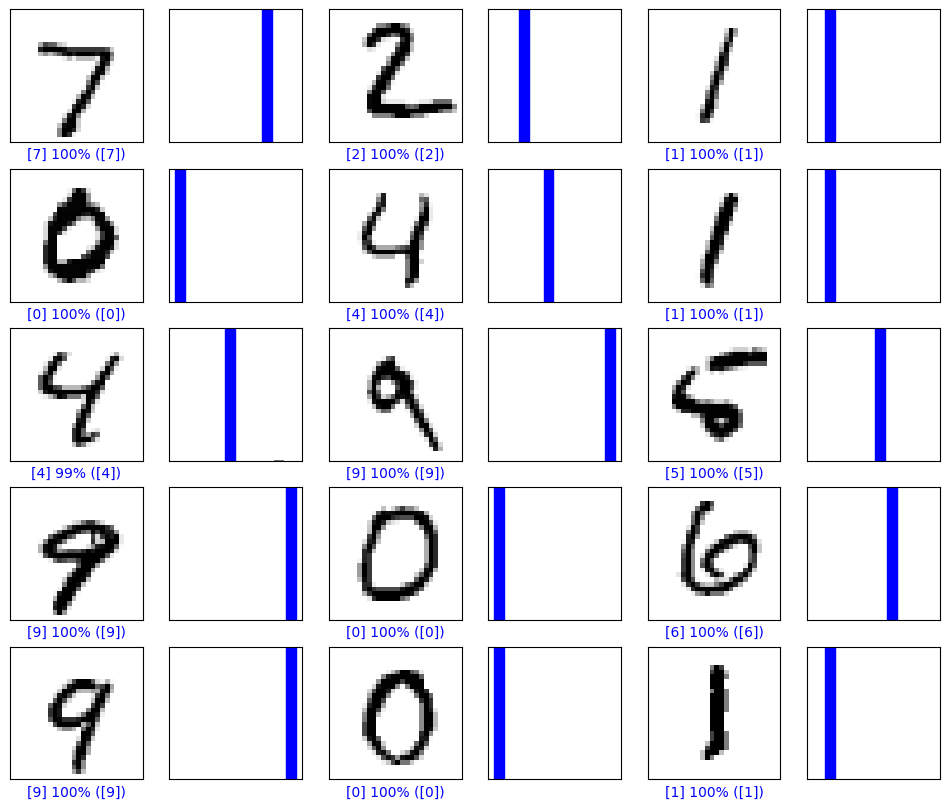

In [45]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
# Set the number of rows for the plot grid
num_rows = 5
# Set the number of columns for the plot grid
num_cols = 3
# Total number of images to display
num_images = num_rows*num_cols
# Create a figure to hold the subplots with a specific size
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
# Loop through the first 'num_images' images
for i in range(num_images):
  # Create a subplot for the image and prediction
  # 2*i+1 selects the odd subplots (left column)
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  # Call the function to plot the image and labels
  plot_image(i, predictions, y_test, x_test)

  # Create a subplot for the prediction probabilities
  # 2*i+2 selects the even subplots (right column)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  # Call the function to plot the value array (probabilities)
  plot_value_array(i, predictions, y_test)
# Display all the plots
plt.show()

In [46]:
print('---------------------------------- END ------------------------------')

---------------------------------- END ------------------------------
